In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

In [0]:
# load data
df = pd.read_csv("/content/drive/My Drive/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Timestap is unix time. I will convert unix time to more readable data

In [0]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

In [6]:
# now Timestamp was converted 
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4363452,2020-04-21 23:56:00,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
4363453,2020-04-21 23:57:00,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
4363454,2020-04-21 23:58:00,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,2020-04-21 23:59:00,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090
4363456,2020-04-22 00:00:00,6850.60,6850.60,6850.60,6850.60,0.014436,98.896906,6850.600000


In [7]:
df["Weighted_Price"].isnull().sum()

1236977

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 266.3 MB


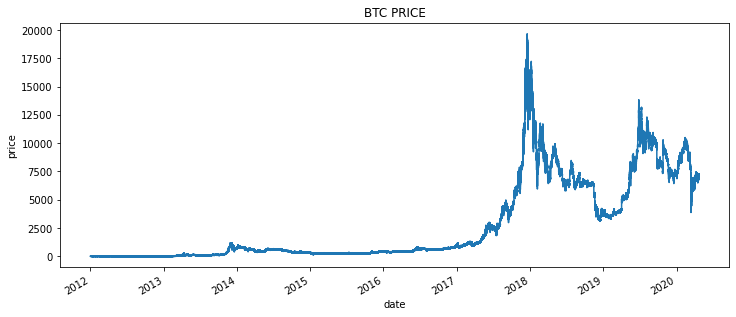

In [9]:
df.set_index("Timestamp")["Weighted_Price"].plot(figsize=(12, 5), title="BTC PRICE")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

As some people know that price was increased on 2018

Let me check volume as well

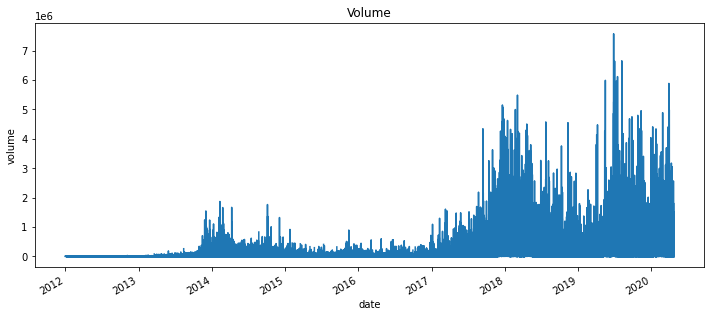

In [10]:
df.set_index("Timestamp")["Volume_(Currency)"].plot(figsize=(12, 5))
plt.title("Volume")
plt.xlabel("date")
plt.ylabel("volume")
plt.show()

As you see in the plot, Volume is increasing even now

In [0]:
# create date columns
df["year"] = df["Timestamp"].dt.year
df["month"] = df["Timestamp"].dt.month
df["day"] = df["Timestamp"].dt.day
df["day_of_week"] = df["Timestamp"].dt.dayofweek

In [12]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,day_of_week
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5


fill in all of the nulls with the last known value.

In [0]:
df = df.fillna(method="ffill")

In [14]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,day_of_week
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5


Check the price by week and month and hour

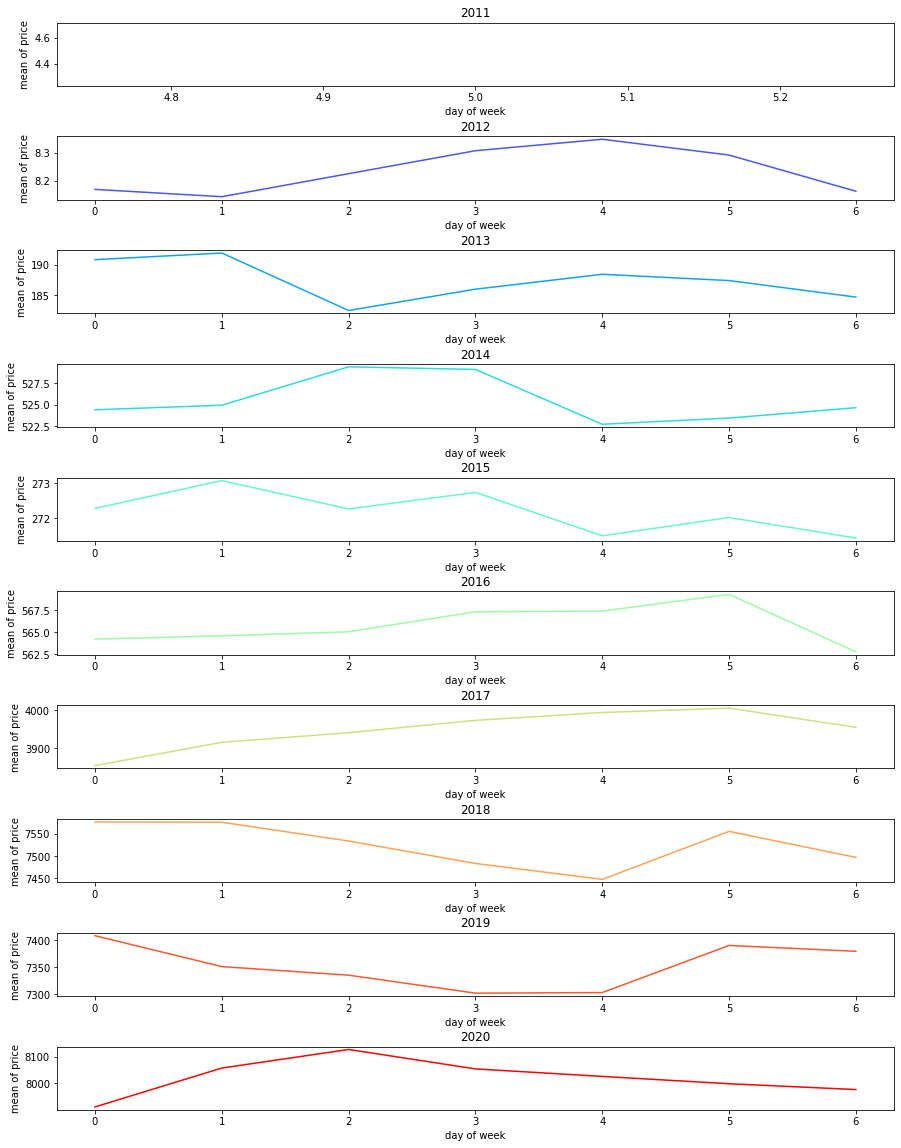

In [15]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.8)

year = df["year"].unique()

color=iter(cm.rainbow(np.linspace(0,1,len(year))))

# day of week(Monday=0, Sunday=6)
for i, value in enumerate(year):
    c = next(color)
    plt.subplot(len(year), 1, i+1)
    df[df["year"] == value].groupby("day_of_week").mean()["Weighted_Price"].plot(c=c)
    plt.xlabel("day of week")
    plt.ylabel("mean of price")
    plt.title(value)

Interestingly since 2012, the trend was almost the same every 2 years

I will check price month as well

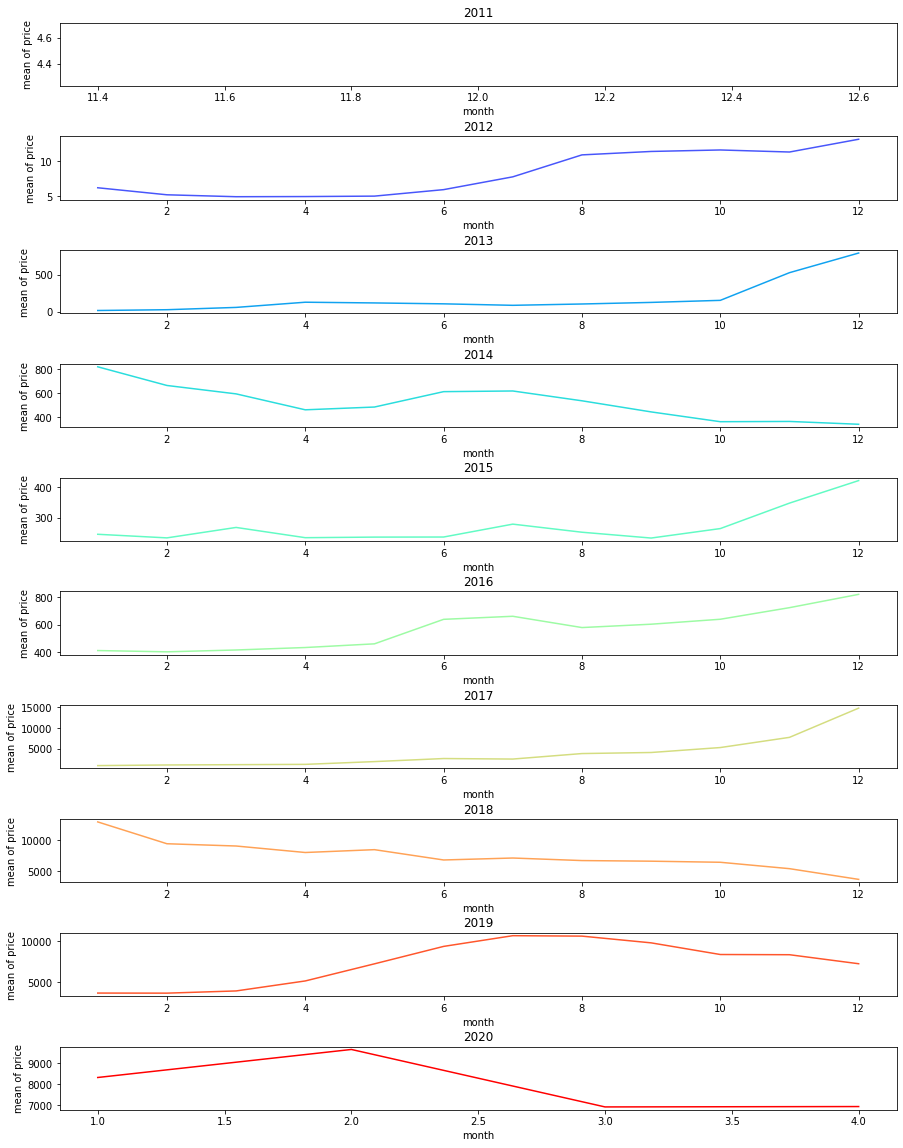

In [16]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.8)


year = df["year"].unique()

color=iter(cm.rainbow(np.linspace(0,1,len(year))))

# day of week(Monday=0, Sunday=6)
for i, value in enumerate(year):
    c = next(color)
    plt.subplot(len(year), 1, i+1)
    df[df["year"] == value].groupby("month").mean()["Weighted_Price"].plot(c=c)
    plt.xlabel("month")
    plt.ylabel("mean of price")
    plt.title(value)

In [17]:
# drop data of 2011
df = df.drop(df[df.year == 2011].index)
# drop duplicate date
df["Timestamp"] = df["Timestamp"].apply(lambda x: x.replace(hour=0, minute=0, second=0))
df = df.drop_duplicates(subset="Timestamp", keep="last")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,day_of_week
2407,2012-01-01,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,2012,1,1,6
3847,2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,2012,1,2,0
5287,2012-01-03,5.29,5.29,5.29,5.29,4.010815,21.217210,5.290000,2012,1,3,1
6727,2012-01-04,5.37,5.57,5.37,5.57,43.312196,235.747069,5.442972,2012,1,4,2
8167,2012-01-05,6.65,6.65,6.65,6.65,0.499266,3.320117,6.650000,2012,1,5,3


In [18]:
# create dataset
prediction_days = 7 # predict price every 7days

df["Prediction"] = df[["Weighted_Price"]].shift(-prediction_days)
df[["Weighted_Price", "Prediction"]].sample(7)

,Weighted_Price,Prediction
1157287,641.010000,585.678551
205447,5.080000,5.070000
3538335,6459.467504,6458.746357
434407,10.430000,10.660000
2747775,959.610640,1077.589504
1065127,823.448821,841.102054
3083295,6608.016873,8097.193788


In [19]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,day_of_week,Prediction
2407,2012-01-01,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,2012,1,1,6,7.00
3847,2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,2012,1,2,0,6.30
5287,2012-01-03,5.29,5.29,5.29,5.29,4.010815,21.217210,5.290000,2012,1,3,1,7.14
6727,2012-01-04,5.37,5.57,5.37,5.57,43.312196,235.747069,5.442972,2012,1,4,2,7.00
8167,2012-01-05,6.65,6.65,6.65,6.65,0.499266,3.320117,6.650000,2012,1,5,3,6.51


In [0]:
X = df.drop(["Low", "Close", "Timestamp", "Prediction"], axis=1)
# remove last 7 days rows
X = X[:len(df)-prediction_days]

y = df["Prediction"]
y = y[:-prediction_days]

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X.values)

# split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import os
# Define parameter
units = 64
batch_size = 32 
epoch = 10000
dropout_rate = 0.1
optimizer = "adam"
loss_function = 'mean_squared_error'
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3
)

In [34]:
# Tensorboard set
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-05-16 02:10:12--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.84.89.161, 34.228.174.189, 18.213.76.145, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.84.89.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  5.54MB/s    in 2.4s    

2020-05-16 02:10:15 (5.54 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = os.path.join("logs")
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

In [42]:
#Run tensorboard
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://4c36f968.ngrok.io


In [0]:
tensorboard_callback = TensorBoard(log_dir=LOG_DIR, histogram_freq=1,
                         write_images=True)

In [0]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units))
model.add(Dropout(dropout_rate))

model.add(Dense(units=1))

model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[early_stop, tensorboard_callback])